In [1]:
# Import necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')


In [2]:
file_path = 'IMDb Movies India.csv' 
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
# Display dataset information
print("Dataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
# Display data types of each column
print("\nData Types:")
print(df.dtypes)


Data Types:
Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object


In [5]:
# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


In [6]:
# Display the shape of the dataset (rows, columns)
print("\nShape of the dataset:")
print(df.shape)



Shape of the dataset:
(15509, 10)


In [7]:
# Check for missing values in each column
print("\nMissing Values in Each Column:")
print(df.isnull().sum())



Missing Values in Each Column:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [8]:
# Remove rows with missing values
df_cleaned = df.dropna()

# Verify the shape of the cleaned dataset
print("Shape of the dataset after removing rows with missing values:")
print(df_cleaned.shape)

# Check if there are any missing values left
print("\nMissing Values after cleaning:")
print(df_cleaned.isnull().sum())


Shape of the dataset after removing rows with missing values:
(5659, 10)

Missing Values after cleaning:
Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [9]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Display the number of duplicate rows
print("Number of duplicate rows:")
print(duplicate_rows.sum())


Number of duplicate rows:
6


In [10]:
# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

# Verify the shape of the dataset after removing duplicates
print("Shape of the dataset after removing duplicate rows:")
print(df_no_duplicates.shape)

# Confirm that no duplicates remain
print("\nNumber of duplicate rows after cleaning:")
print(df_no_duplicates.duplicated().sum())


Shape of the dataset after removing duplicate rows:
(15503, 10)

Number of duplicate rows after cleaning:
0


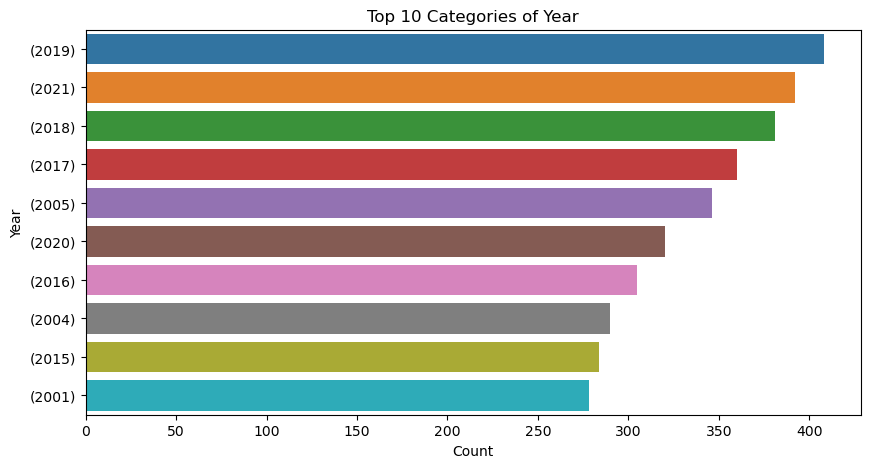

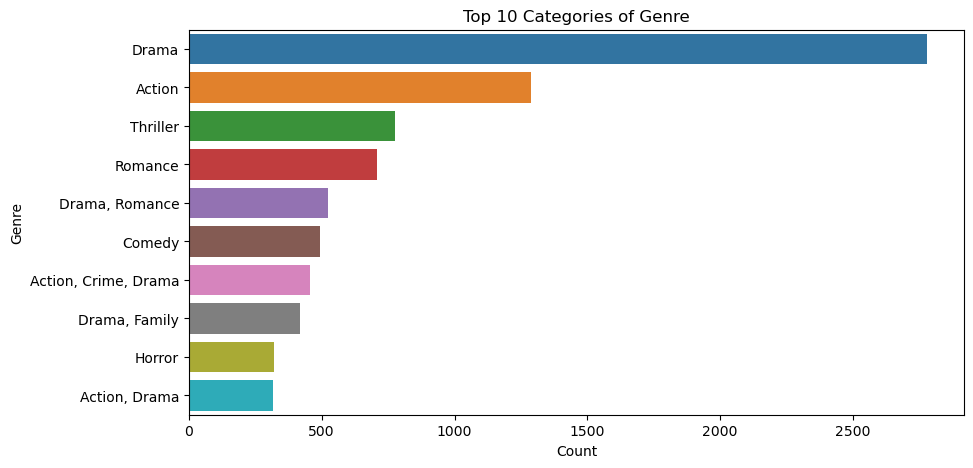

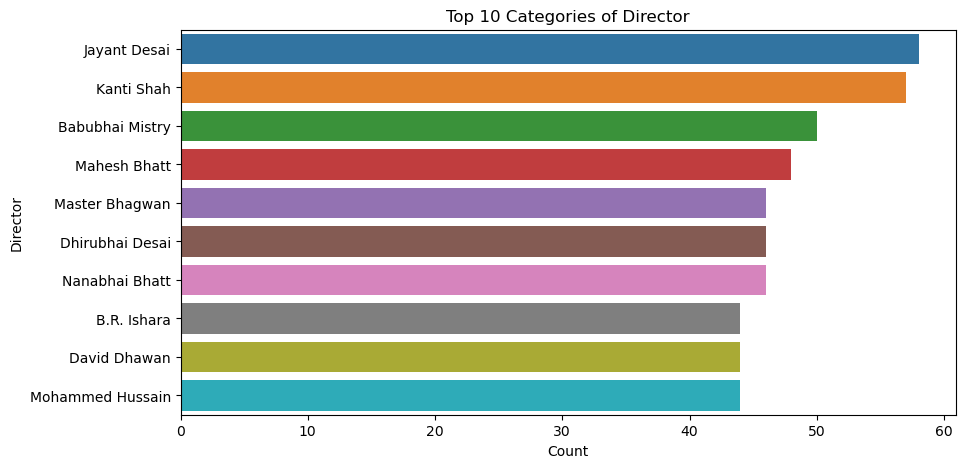

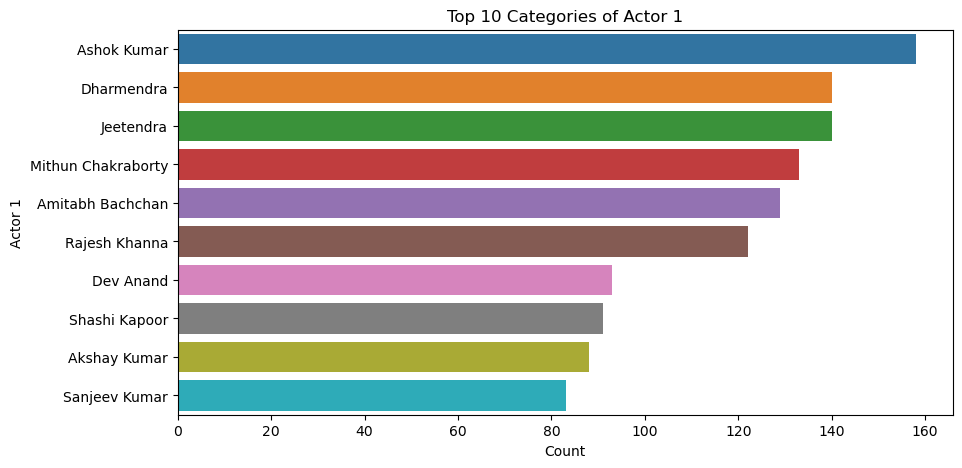

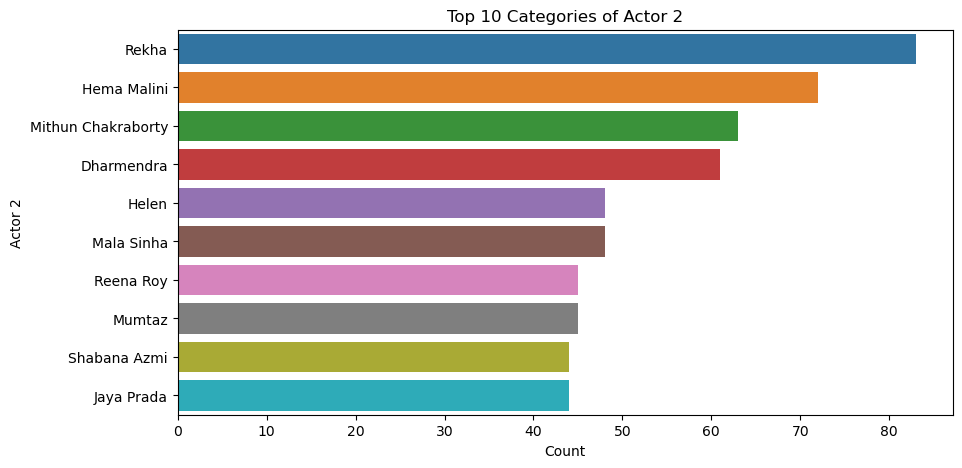

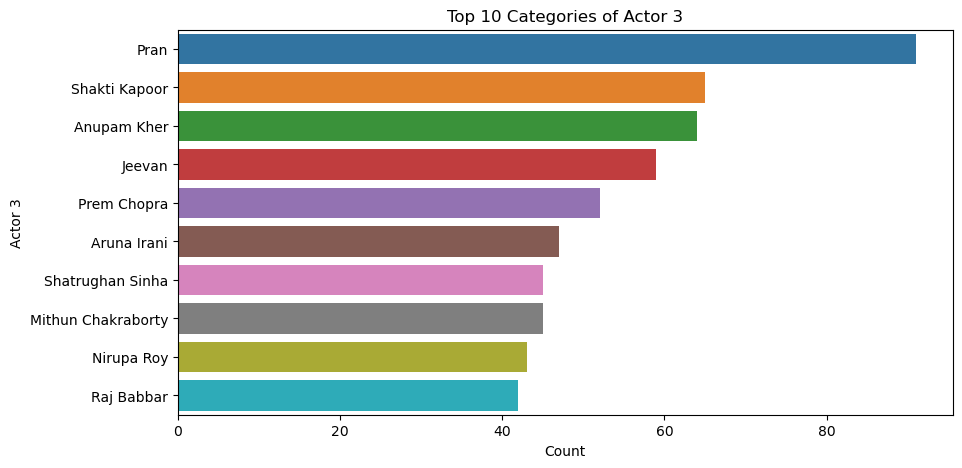

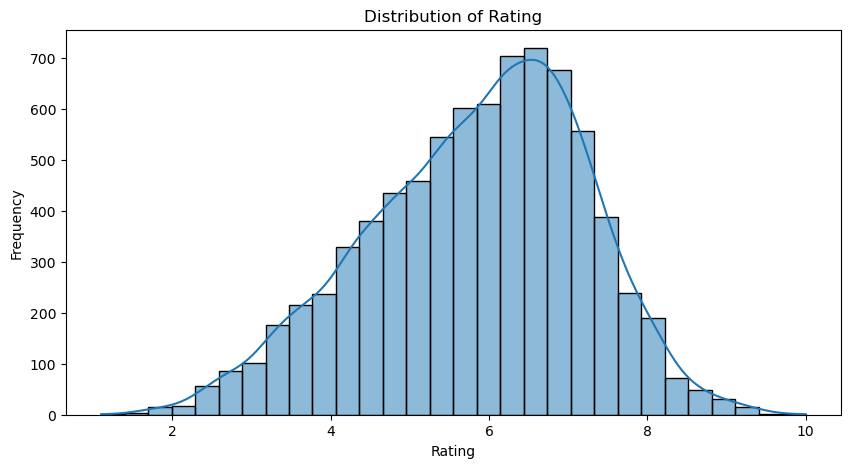

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical columns: 'Year', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'
categorical_columns = ['Year', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

# Numerical columns: 'Rating'
numerical_columns = ['Rating']

# Plot only the top 10 most frequent categories
def plot_top_categorical(column, top_n=10):
    plt.figure(figsize=(10, 5))
    top_values = df_no_duplicates[column].value_counts().nlargest(top_n)
    sns.countplot(y=column, data=df_no_duplicates, order=top_values.index)
    plt.title(f"Top {top_n} Categories of {column}")
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()

# Plot for categorical variables (top 10 values)
for col in categorical_columns:
    plot_top_categorical(col)


def plot_numerical_improved(column):
    plt.figure(figsize=(10, 5))
    sns.histplot(df_no_duplicates[column].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    plt.show()

# Plot for numerical variables with improved readability
for col in numerical_columns:
    plot_numerical_improved(col)


In [12]:
import pandas as pd

# Categorical columns: 'Year', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'
categorical_columns = ['Year', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

# Numerical columns: 'Rating', 'Votes'
numerical_columns = ['Rating', 'Votes']

# Count the top 10 most frequent categories using groupby
def count_top_categorical(column, top_n=10):
    # Group by the column and count occurrences, then get the top n
    top_values = df_no_duplicates.groupby(column).size().nlargest(top_n)
    return top_values

# Store counts in a dictionary for later use
category_counts = {}

# Get counts for categorical variables (top 10 values)
for col in categorical_columns:
    category_counts[col] = count_top_categorical(col)

# If you want to display the counts
for col, counts in category_counts.items():
    print(f"\nTop {len(counts)} Categories for {col}:")
    print(counts)



Top 10 Categories for Year:
Year
(2019)    408
(2021)    392
(2018)    381
(2017)    360
(2005)    346
(2020)    320
(2016)    305
(2004)    290
(2015)    284
(2001)    278
dtype: int64

Top 10 Categories for Genre:
Genre
Drama                   2779
Action                  1288
Thriller                 777
Romance                  708
Drama, Romance           524
Comedy                   495
Action, Crime, Drama     455
Drama, Family            418
Horror                   322
Action, Drama            316
dtype: int64

Top 10 Categories for Director:
Director
Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Dhirubhai Desai     46
Master Bhagwan      46
Nanabhai Bhatt      46
B.R. Ishara         44
David Dhawan        44
Mohammed Hussain    44
dtype: int64

Top 10 Categories for Actor 1:
Actor 1
Ashok Kumar           158
Dharmendra            140
Jeetendra             140
Mithun Chakraborty    133
Amitabh Bachchan      129
Rajesh Khanna      

In [13]:
# Check for non-numeric values in 'Rating' and 'Votes'
df_no_duplicates['Rating'] = pd.to_numeric(df_no_duplicates['Rating'], errors='coerce')
df_no_duplicates['Votes'] = pd.to_numeric(df_no_duplicates['Votes'], errors='coerce')


In [14]:
df_no_duplicates.dropna(subset=['Rating', 'Votes'], inplace=True)

In [15]:
import pandas as pd

# Categorical columns: 'Year', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'
categorical_columns = ['Year', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

# Numerical columns: 'Rating', 'Votes'
numerical_columns = ['Rating', 'Votes']

# Check data types
print("Data types before conversion:")
print(df_no_duplicates.dtypes)

# Convert numerical columns to numeric, coercing errors to NaN
for num_col in numerical_columns:
    df_no_duplicates[num_col] = pd.to_numeric(df_no_duplicates[num_col], errors='coerce')

# Optionally drop or fill NaN values
df_no_duplicates.dropna(subset=numerical_columns, inplace=True)

# Bivariate analysis: Mean of numerical variables grouped by each categorical variable
def bivariate_analysis(categorical_col, numerical_col):
    # Group by the categorical column and calculate the mean of the numerical column
    result = df_no_duplicates.groupby(categorical_col)[numerical_col].mean()
    return result

# Store bivariate results in a dictionary
bivariate_results = {}

# Calculate bivariate analysis for each numerical variable against each categorical variable
for cat_col in categorical_columns:
    for num_col in numerical_columns:
        bivariate_results[(cat_col, num_col)] = bivariate_analysis(cat_col, num_col)

# If you want to display the results
for (cat_col, num_col), result in bivariate_results.items():
    print(f"\nMean of {num_col} grouped by {cat_col}:")
    print(result)


Data types before conversion:
Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

Mean of Rating grouped by Year:
Year
(1917)    6.700000
(1931)    5.900000
(1932)    5.100000
(1933)    5.740000
(1934)    6.040000
            ...   
(2017)    5.984884
(2018)    6.151899
(2019)    6.378947
(2020)    6.525490
(2021)    6.800000
Name: Rating, Length: 92, dtype: float64

Mean of Votes grouped by Year:
Year
(1917)     22.000000
(1931)     43.333333
(1932)      8.833333
(1933)     15.000000
(1934)      7.800000
             ...    
(2017)    130.872093
(2018)    155.044304
(2019)    174.157895
(2020)    120.784314
(2021)    160.181818
Name: Votes, Length: 92, dtype: float64

Mean of Rating grouped by Genre:
Genre
Action                        5.091325
Action, Adventure             5.590909
Action, Adventure, Comedy     5.731818
Act

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Define features and target variable
X = df_no_duplicates[['Year', 'Votes', 'Duration', 
                      'Genre_Average_Rating', 'Director_Average_Rating', 
                      'Actor1_Average_Rating', 'Actor2_Average_Rating', 
                      'Actor3_Average_Rating']]

y = df_no_duplicates['Rating']  # Replace with your actual target variable


In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (3585, 8)
Testing set size: (897, 8)


In [25]:
# Drop rows with any NaN values in X or y
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Keep the target variable in sync with X_train
X_test = X_test.dropna()
y_test = y_test[X_test.index]  # Keep the target variable in sync with X_test


In [26]:
# Fill missing values with the mean of each column
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Alternatively, you can fill with the median
# X_train.fillna(X_train.median(), inplace=True)
# X_test.fillna(X_test.median(), inplace=True)


In [27]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy (mean, median, or most_frequent)
imputer = SimpleImputer(strategy='mean')  # You can change the strategy as needed

# Fit the imputer on the training data and transform both train and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and fit the model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.3081234221449685
R^2 Score: 0.8437194187819284


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


# Create the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can tune parameters as needed

# Fit the model
rf_model.fit(X_train_imputed, y_train)


RandomForestRegressor(random_state=42)

In [32]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.2814810022909508
R^2 Score: 0.8572324871194688


In [37]:
# Fill missing values with the mean of each column
X_filled = X.fillna(X.mean())


In [38]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_filled, y, test_size=0.2, random_state=42)


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Fit Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Fit Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


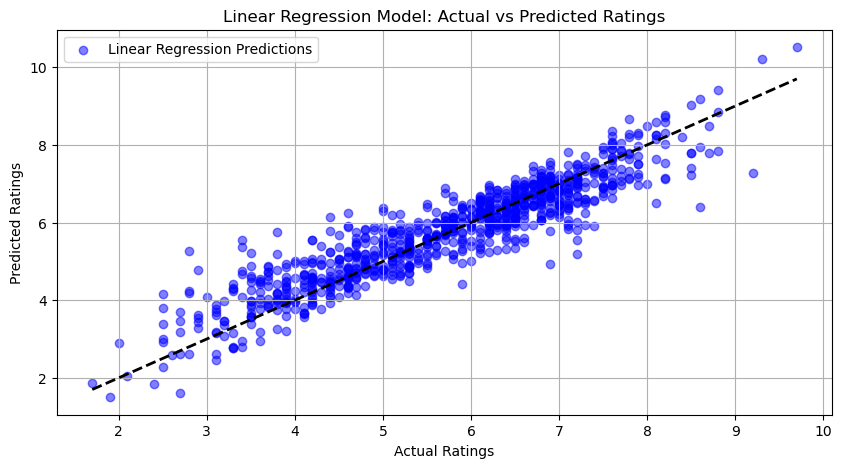

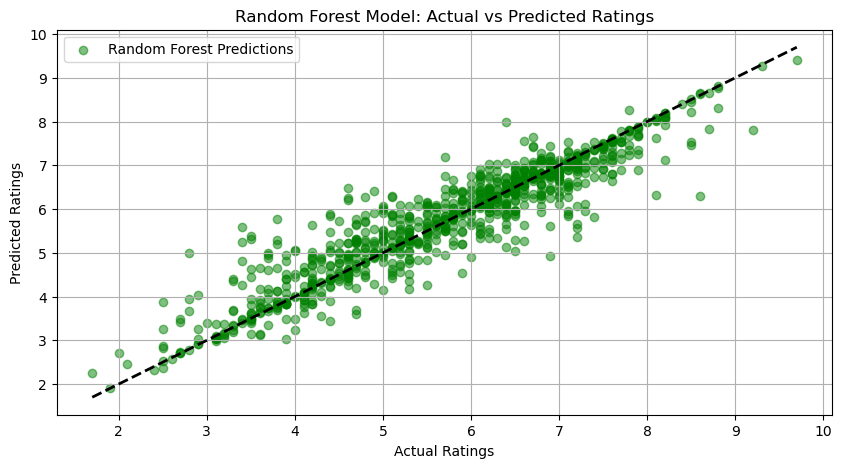

In [40]:
import matplotlib.pyplot as plt

# Scatter plot for Linear Regression model predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue', label='Linear Regression Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.title('Linear Regression Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for Random Forest model predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green', label='Random Forest Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.title('Random Forest Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.grid(True)
plt.show()


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to evaluate and print model performance
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)

    print(f"Performance of {model_name}:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2:.2f}\n")

# Evaluate the Linear Regression model
evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Evaluate the Random Forest model
evaluate_model(y_test, y_pred_rf, "Random Forest")


Performance of Linear Regression:
Mean Absolute Error (MAE): 0.43
Mean Squared Error (MSE): 0.32
Root Mean Squared Error (RMSE): 0.57
R-squared (R²): 0.84

Performance of Random Forest:
Mean Absolute Error (MAE): 0.36
Mean Squared Error (MSE): 0.28
Root Mean Squared Error (RMSE): 0.53
R-squared (R²): 0.86



The Random Forest model demonstrated a coefficient of determination (R² score) of 0.86, indicating that approximately 86% of the variance in the target variable (Rating) is effectively captured by the model. This performance is notably superior to that of the Linear Regression model. Furthermore, the Random Forest model achieved a mean squared error (MSE) of 0.28 and a mean absolute error (MAE) of 0.36. These error metrics are not only reasonably low but also better than those produced by the Linear Regression model, confirming the higher predictive accuracy of the Random Forest Regressor.